## *Exercises*

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
# import modules
import env
from wordcloud import WordCloud

# set display options
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

##### 1. Spam Data

- __*Load the spam data set.*__

In [4]:
url = env.get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")

In [5]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
ham_words = clean(' '.join(df[df.label == 'ham']['text']))
spam_words = clean(' '.join(df[df.label == 'spam']['text']))
all_words = clean(' '.join(df['text']))

- __*Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?*__

In [23]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words))
ham_bigrams = pd.Series(nltk.bigrams(ham_words))
all_bigrams = pd.Series(nltk.bigrams(all_words))
# top_20
top_20_spam_bigrams = spam_bigrams.value_counts().head(20)
top_20_ham_bigrams = ham_bigrams.value_counts().head(20)
top_20_all_bigrams = all_bigrams.value_counts().head(20)

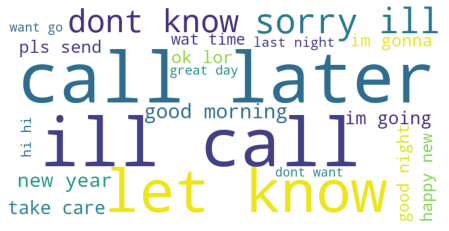

In [24]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

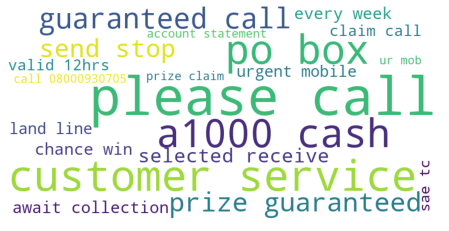

In [25]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

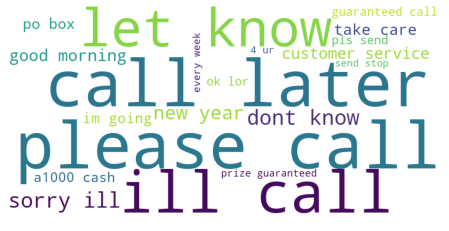

In [26]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

- __*Is there any overlap in the bigrams for the spam data and the ham data?*__

In [27]:
spam_freq = spam_bigrams.value_counts()
ham_freq = ham_bigrams.value_counts()
all_freq = all_bigrams.value_counts()

In [44]:
bigram_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

bigram_counts.sort_values(by='all', ascending=False).head()

,,all,ham,spam
please,call,53,9,44
call,later,52,52,0
ill,call,48,48,0
let,know,42,42,0
sorry,ill,39,39,0


In [42]:
#bigram_counts[(bigram_counts.ham > 1) & (bigram_counts.spam > 1)]

In [49]:
bigram_counts.shape

(38747, 3)

In [48]:
# remove bigrams where spam and ham words have same frequency 
for i in range(1, 5):
    bigram_counts.drop(bigram_counts[(bigram_counts.ham == i) & (bigram_counts.spam == i)].index, inplace =True)

- __*Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.*__

In [52]:
def get_ngram_frequency(ser:pd.Series, n:int = 1)->pd.Series:
    words = ' '.join(ser).split()
    if n > 1:
        ngrams = nltk.ngrams(words,n)
        words = [' '.join(n) for n in ngrams]
    return pd.Series(words).value_counts()

In [53]:
get_ngram_frequency(spam_words, 3)

prize guaranteed call     21
call customer service     15
land line claim           14
reply call 08000930705    14
private 2003 account      13
                          ..
cw25wx 150ppm call         1
326 cw25wx 150ppm          1
a5000 cash await           1
holiday a5000 cash         1
now1 10p per               1
Length: 8112, dtype: int64

In [56]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3))
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3))
all_trigrams = pd.Series(nltk.ngrams(all_words, 3))
# frequencies
spam_freq3 = spam_trigrams.value_counts()
ham_freq3 = ham_trigrams.value_counts()
all_freq3 = all_trigrams.value_counts()

# top_20
top_20_spam_trigrams = spam_trigrams.value_counts().head(20)
top_20_ham_trigrams = ham_trigrams.value_counts().head(20)
top_20_all_trigrams = all_trigrams.value_counts().head(20)

In [57]:
top_20_ham_trigrams

(ill, call, later)          42
(sorry, ill, call)          38
(happy, new, year)          19
(pls, send, message)        13
(cant, pick, phone)         12
(right, pls, send)          12
(phone, right, pls)         12
(pick, phone, right)        12
(hi, hi, hi)                11
(x, x, x)                    8
(good, morning, dear)        7
(call, later, meeting)       6
(convey, birthday, wish)     6
(pls, convey, birthday)      6
(kiss, across, sea)          6
(lunch, lunch, invited)      5
(man, last, week)            5
(story, man, last)           5
(sad, story, man)            5
(love, go, day)              5
dtype: int64

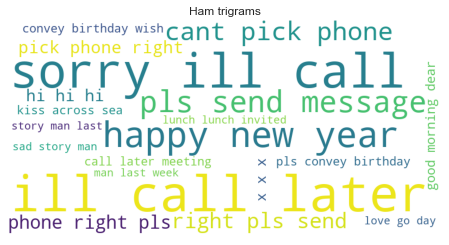

In [61]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Ham trigrams')
plt.axis('off')
plt.show()

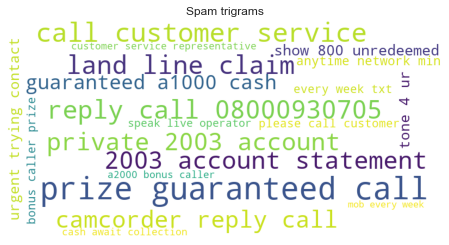

In [62]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Spam trigrams')
plt.axis('off')
plt.show()

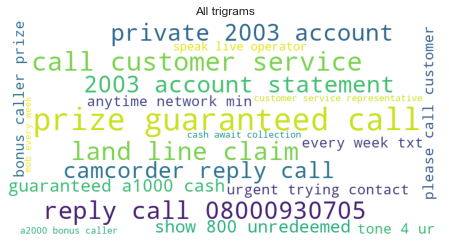

In [63]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('All trigrams')
plt.axis('off')
plt.show()

In [69]:
# check overlaps
trigram_counts = (pd.concat([all_freq3, ham_freq3, spam_freq3], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

trigram_counts.sort_values(by='all', ascending=False).head(20)

,,,all,ham,spam
ill,call,later,42,42,0
sorry,ill,call,38,38,0
prize,guaranteed,call,21,0,21
happy,new,year,19,19,0
call,customer,service,15,0,15
reply,call,08000930705,14,0,14
land,line,claim,14,0,14
private,2003,account,13,0,13
2003,account,statement,13,0,13
pls,send,message,13,13,0


In [73]:
trigram_counts[(trigram_counts.ham == 1) & (trigram_counts.spam == 1)]

,,,all,ham,spam
called,left,message,2,1,1
new,year,eve,2,1,1
number,im,glad,2,1,1


##### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [118]:
import acquire as ac
blogs = pd.DataFrame(ac.get_blog_articles())

In [119]:
blogs

,title,content
0,Become a Data Scientist in 6 Months!,Are you feeling unfulfilled in your work but w...
1,Hiring Tech Talent Around the Holidays,Are you a hiring manager having trouble fillin...
2,Cloud Administration Program New Funding Options,Finding resources to fund your educational goa...
3,Why Dallas is a Great Location for IT Professi...,"When breaking into a new career, it is importa..."
4,Codeup is ranked #1 Best in DFW 2022,We are excited to announce that Codeup ranked ...
5,Codeup’s Scholarship Offerings,In honor of November being National Scholarshi...


In [120]:
import prepare as pr
pr.prep_article_data(blogs, 'content', keep_digits=False)

,title,content,clean,stemmed,lemmatized
0,Become a Data Scientist in 6 Months!,Are you feeling unfulfilled in your work but w...,feeling unfulfilled work want avoid returning ...,feel unfulfil work want avoid return tradit ed...,feeling unfulfilled work want avoid returning ...
1,Hiring Tech Talent Around the Holidays,Are you a hiring manager having trouble fillin...,hiring manager trouble filling position around...,hire manag troubl fill posit around holiday co...,hiring manager trouble filling position around...
2,Cloud Administration Program New Funding Options,Finding resources to fund your educational goa...,finding resources fund educational goals possi...,find resourc fund educ goal possibl largest ob...,finding resource fund educational goal possibl...
3,Why Dallas is a Great Location for IT Professi...,"When breaking into a new career, it is importa...",breaking new career important explore job oppo...,break new career import explor job opportun ex...,breaking new career important explore job oppo...
4,Codeup is ranked #1 Best in DFW 2022,We are excited to announce that Codeup ranked ...,excited announce codeup ranked best tradetechn...,excit announc codeup rank best tradetechn scho...,excited announce codeup ranked best tradetechn...
5,Codeup’s Scholarship Offerings,In honor of November being National Scholarshi...,honor november national scholarship month wed ...,honor novemb nation scholarship month wed like...,honor november national scholarship month wed ...


In [123]:
get_ngram_frequency(blogs.lemmatized).head(20)

tech           20
program        20
career         19
job            16
give           13
codeup         13
well           12
dallas         10
new             9
information     8
bootcamp        8
youll           8
workshop        8
cloud           7
company         7
also            7
financial       7
get             6
student         6
hiring          6
dtype: int64

In [130]:
get_ngram_frequency(blogs.lemmatized, 2).head(20)

career tech               6
get started               5
financial aid             5
youll learn               5
new job                   5
learn program             4
give information          4
information inbox         4
information financial     4
program well              4
employer partner          4
give taste                4
data science              4
designed give             4
currently accredited      4
workshop designed         4
workshop workshop         4
aid admissionswe          4
instructorled workshop    4
well give                 4
dtype: int64

In [134]:
blog_words = ' '.join(blogs.lemmatized).split()

In [165]:
blog_words[:5]

['feeling', 'unfulfilled', 'work', 'want', 'avoid']

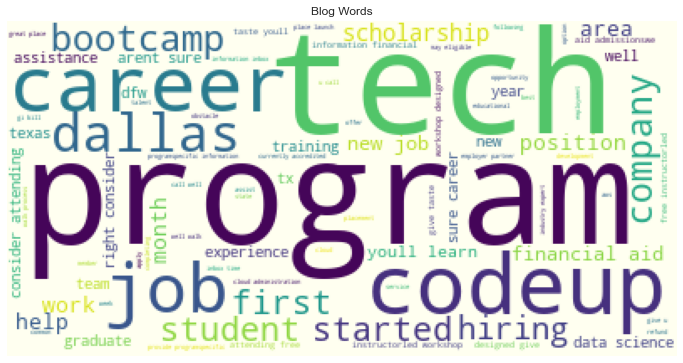

In [167]:
plt.figure(figsize=(12,8))
img = WordCloud(background_color='Ivory').generate(' '.join(blog_words))
plt.imshow(img)
plt.axis('off')
plt.title('Blog Words')
plt.show()

In [159]:
blog_bigrams = pd.Series(nltk.bigrams(blog_words))

# frequencies
blog_freq = blog_bigrams.value_counts()


# top_20
top_20_blog_bigrams = blog_freq.head(20)


In [160]:
top_20_blog_bigrams

(career, tech)               6
(get, started)               5
(financial, aid)             5
(youll, learn)               5
(new, job)                   5
(learn, program)             4
(give, information)          4
(information, inbox)         4
(information, financial)     4
(program, well)              4
(employer, partner)          4
(give, taste)                4
(data, science)              4
(designed, give)             4
(currently, accredited)      4
(workshop, designed)         4
(workshop, workshop)         4
(aid, admissionswe)          4
(instructorled, workshop)    4
(well, give)                 4
dtype: int64

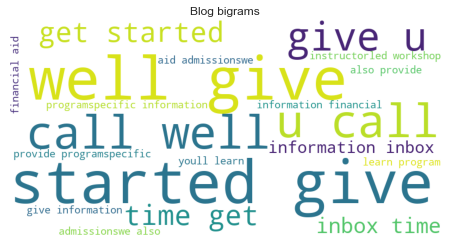

In [144]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_blog_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Blog bigrams')
plt.show()

In [142]:
blog_trigrams = pd.Series(nltk.ngrams(blog_words, 3))
# frequencies
blog_freq3 = blog_trigrams.value_counts()
# top_20
top_20_blog_trigrams = blog_freq3.head(20)

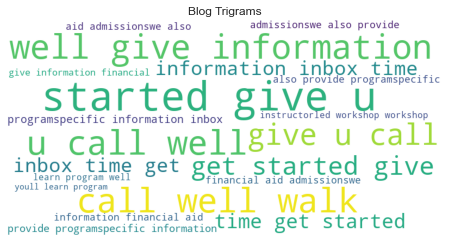

In [145]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_blog_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Blog Trigrams')
plt.show()

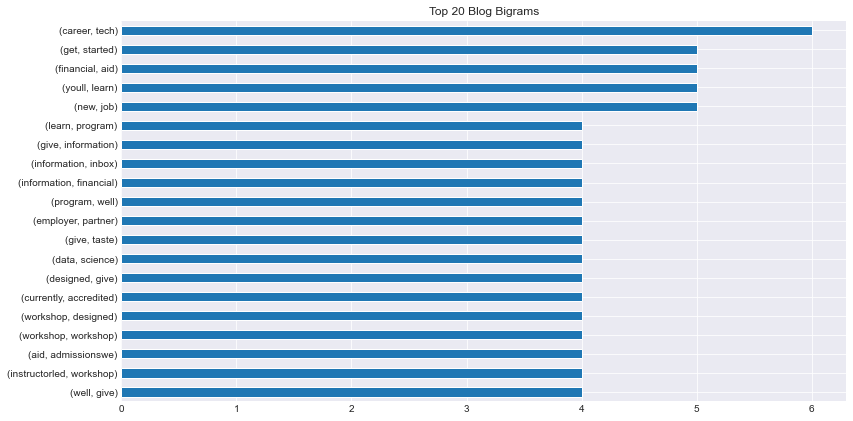

In [164]:
top_20_blog_bigrams.plot.barh(ec='white')
plt.title('Top 20 Blog Bigrams')
plt.gca().invert_yaxis()
plt.show()

##### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [171]:
news = pd.DataFrame(ac.get_news_articles())

In [191]:
news = news[['content']].copy()

In [181]:
#pr.prep_article_data(news, 'content', keep_digits=False)

In [188]:
news['content'] = news.content.apply(pr.basic_clean, keep_digits=False).apply(pr.tokenize).apply(pr.remove_stopwords,\
                extra_words=['\'', 'rahul', 'ashok', 'gandhi'])

In [193]:
news_words = ' '.join(news.content).split()

In [197]:
pd.Series(news_words).value_counts().head(20)

said        214
india        68
added        52
monday       43
people       37
world        36
us           35
one          34
reported     33
new          33
video        32
two          32
first        31
also         29
time         28
company      27
tesla        25
year         25
picture      25
twitter      25
dtype: int64

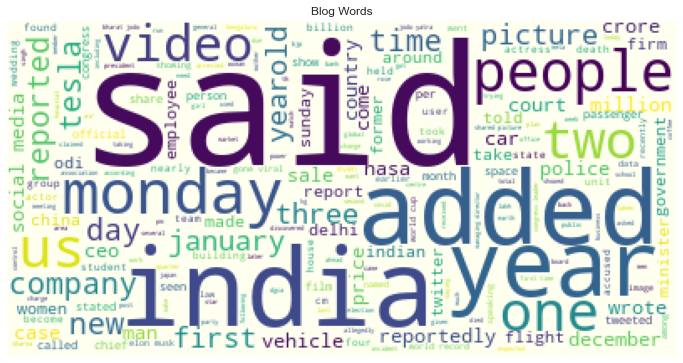

In [196]:
plt.figure(figsize=(12,8))
img = WordCloud(background_color='Ivory').generate(' '.join(news_words))
plt.imshow(img)
plt.axis('off')
plt.title('Blog Words')
plt.show()

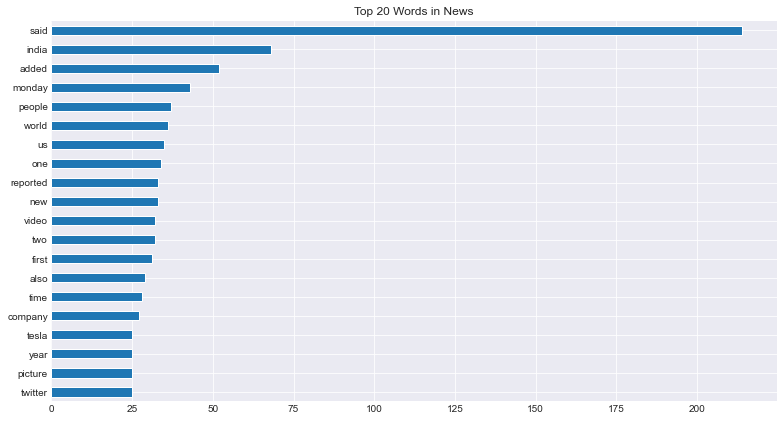

In [199]:
pd.Series(news_words).value_counts().head(20).plot.barh(ec='white')
plt.title('Top 20 Words in News')
plt.gca().invert_yaxis()
plt.show()

### Bi-grams

In [203]:
# create bigrams
news_bigrams = pd.Series(nltk.bigrams(news_words))

# frequencies
news_freq = news_bigrams.value_counts()

# top_20
top_20_news_bigrams = news_freq.head(20)

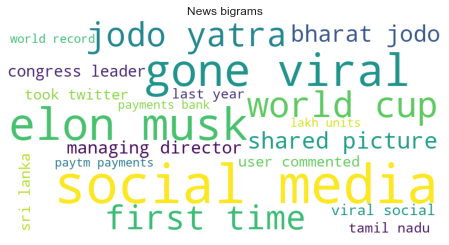

In [204]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_news_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('News bigrams')
plt.show()

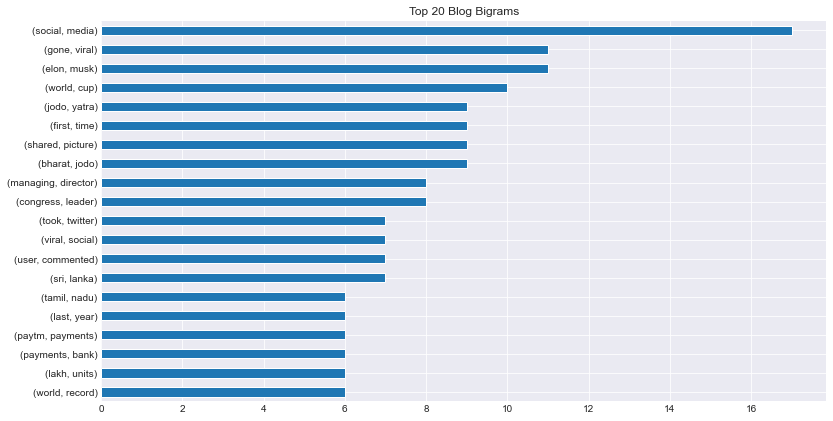

In [205]:
top_20_news_bigrams.plot.barh(ec='white')
plt.title('Top 20 Blog Bigrams')
plt.gca().invert_yaxis()
plt.show()

### Sentiment Analysis

In [211]:
news.head(1)

,content
0,goabound flight russia moscow made emergency l...


In [208]:
s = news.iloc[0, 0]

In [209]:
import nltk.sentiment
# we call nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [210]:
sia.polarity_scores(s)

{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'compound': -0.8979}

In [214]:
news['negative_score'] = news['content'].apply(lambda x: sia.polarity_scores(x)['neg'])
news['neutral_score'] = news['content'].apply(lambda x: sia.polarity_scores(x)['neu'])
news['positive_score'] = news['content'].apply(lambda x: sia.polarity_scores(x)['pos'])
news['sentiment'] = news['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [226]:
# top 10 positive news
news.sort_values(by='positive_score', ascending=False).head(10)

,content,negative_score,neutral_score,positive_score,sentiment
185,malayalam actor tovino thomas recently met ms ...,0.000,0.553,0.447,0.9698
242,picture lion cub taken us photographer jennife...,0.055,0.567,0.378,0.9491
199,bandhan bank launched new ad featuring sourav ...,0.000,0.646,0.354,0.9382
218,boa constrictor snake caught airport security ...,0.000,0.652,0.348,0.8979
231,video gone viral social media showing tiger su...,0.000,0.681,0.319,0.9022
188,actress shriya pilgaonkar opened playing madhu...,0.000,0.686,0.314,0.8750
115,aam aadmi party aap set fullfledged organisati...,0.059,0.629,0.312,0.8979
38,tesla ceo elon musk took twitter say hope peop...,0.161,0.529,0.310,0.7650
34,gautam adani appearance india tv aap ki adalat...,0.000,0.690,0.310,0.9001
173,tesla ceo elon musk took twitter say hope peop...,0.161,0.529,0.310,0.7650


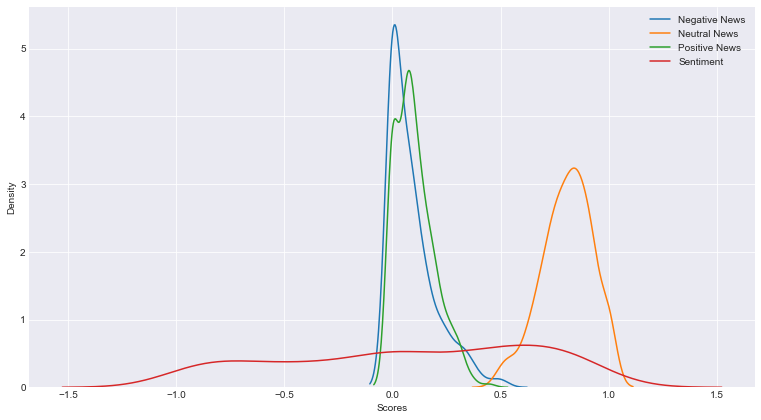

In [228]:
sns.kdeplot(news.negative_score, label='Negative News')
sns.kdeplot(news.neutral_score, label='Neutral News')
sns.kdeplot(news.positive_score, label='Positive News')
sns.kdeplot(news.sentiment, label='Sentiment')
plt.xlabel('Scores')
plt.legend()
plt.show()